<a href="https://colab.research.google.com/github/Vinaypatil-Ev/vinEvPy-GoCoLab/blob/main/Tensorflow/TensorflowPrac6_GradientTape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

## Gradient Tape in tensorflow

### Gradients and automatic differntiation

### automatic differentiation is useful in algorithsm like *backpropogation* for trining neural networks

## *tf.GradientTape*

In [ ]:
# y = x ** 2
# at x = 3.0, dy/dx = 2x = 6

x = tf.Variable(3.0)

with tf.GradientTape() as tape:
  y = x ** 2

tape.gradient(y, x).numpy()

6.0

### 1. Variable should be trainable
### 2. If it is only tensor or variable with false trainable fails to calculate gradient

## 3. Variable (trainable)
### *tf.Variable(3.0)*
## 4. Variable (not trainable)
### *tf.Variable(3.0, trainable=False)*
## 5. Variable + tensor = tensor (not trainable) 
### *tf.Variable(3.0) + 1.0*
## 6. Constant (not a variable and trainable)
### *tf.constant(3.0)*

In [ ]:
x = tf.constant(3.0)

with tf.GradientTape() as tape1:
  y = x ** 2

print(tape1.gradient(y, x)) ## fails to calculate gradient

with tf.GradientTape() as tape2:
  tape2.watch(x)
  y = x ** 2

print(tape2.gradient(y, x))

None
tf.Tensor(6.0, shape=(), dtype=float32)


### Stop default behaviour of watching behaviour of Varible using 
### *watch_accessed_variables=False*

In [ ]:
x = tf.Variable(3.0)
y = tf.Variable(6.0)
z = tf.Variable(12.0)

with tf.GradientTape() as tape3:
  # tape3.watch(x)
  y = x ** 2 + y * 28.0 +  28.0 * z
  
print(tape3.gradient(y, [x, y, z]))

print("----------------------------\n")

with tf.GradientTape(watch_accessed_variables=False) as tape4:
  tape4.watch(z)
  
  y = x ** 2 + y * 28.0 +  28.0 * z
  
print(tape4.gradient(y, [x, y, z])) ## y is watched and z is made to watch by tape.watch(z) and x isnt watched as default

[<tf.Tensor: shape=(), dtype=float32, numpy=6.0>, <tf.Tensor: shape=(), dtype=float32, numpy=1.0>, <tf.Tensor: shape=(), dtype=float32, numpy=28.0>]
----------------------------

[None, <tf.Tensor: shape=(), dtype=float32, numpy=1.0>, <tf.Tensor: shape=(), dtype=float32, numpy=28.0>]


### Resources are released as soon as we call *tf.GradientTape()*
### To call multiple times use
## *persistence=True*

In [ ]:
x5 = tf.constant([1.0, 3.0])

with tf.GradientTape(persistent=True) as tape5:
  tape5.watch(x5)
  y5 = x5 * x5
  z5 = y5 * y5

print(tape5.gradient(y5, x5))
print(tape5.gradient(z5, x5))
print(tape5.gradient(z5, y5))

del tape5 ## drop persistent reference of tape

tf.Tensor([2. 6.], shape=(2,), dtype=float32)
tf.Tensor([  4. 108.], shape=(2,), dtype=float32)
tf.Tensor([ 2. 18.], shape=(2,), dtype=float32)


### Gradient of multiple targets result as sum of targets

In [ ]:
x6 = tf.constant([1.0, 3.0])

with tf.GradientTape() as tape6:
  tape6.watch(x6)
  y6 = x6 * x6
  z6 = y6 * y6

print(tape6.gradient([y6, z6], x6))


tf.Tensor([  6. 114.], shape=(2,), dtype=float32)


### similarly, if target is not scalar then gradient of sum is calculated

In [ ]:
x = tf.constant(2.0)
w = tf.constant([4.0, 4.0])
x2 = tf.constant([1.0, 2.0])

with tf.GradientTape(persistent=True) as tape:
  tape.watch([x, x2])
  y = x * w
  y2 = x * [4.0, 4.0]
  z = x2 * w
  z2 = x2 * [4.0, 4.0]

print(tape.gradient(y, x))
print(tape.gradient(y2, x))
print(tape.gradient(z, x2))
print(tape.gradient(z2, x2))

tf.Tensor(8.0, shape=(), dtype=float32)
tf.Tensor(8.0, shape=(), dtype=float32)
tf.Tensor([4. 4.], shape=(2,), dtype=float32)
tf.Tensor([4. 4.], shape=(2,), dtype=float32)


In [ ]:
w = tf.random.normal([3, 2], dtype=tf.float64)
x = tf.random.normal([1, 3], dtype=tf.float64)
b = tf.zeros([3, 1], dtype=tf.float64)

print(x)
print(w)
print(b)
print(x @ w)
with tf.GradientTape(persistent=True) as tape:
  y = x @ w + b
  loss = tf.reduce_sum(y**2)

tape.gradient(loss, [w, b])


tf.Tensor([[ 0.1740043  -0.58566987  0.87399677]], shape=(1, 3), dtype=float64)
tf.Tensor(
[[-1.14317209 -1.19400099]
 [-0.30554563  1.7611922 ]
 [-1.08032115  1.46664125]], shape=(3, 2), dtype=float64)
tf.Tensor(
[[0.]
 [0.]
 [0.]], shape=(3, 1), dtype=float64)
tf.Tensor([[-0.96416518  0.0426012 ]], shape=(1, 2), dtype=float64)


[None, None]

In [ ]:
layer = tf.keras.layers.Dense(2, activation="relu")
x = tf.constant([[1., 2.0, 3.0]])
y = layer(x)

In [ ]:
with tf.GradientTape() as tape:
  y = layer(x)
  loss = tf.reduce_mean(y**2)

In [ ]:
tape.gradient(loss, layer.trainable_variables) 

[<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[0.        , 0.65228343],
        [0.        , 1.3045669 ],
        [0.        , 1.9568503 ]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([0.        , 0.65228343], dtype=float32)>]

In [ ]:
import matplotlib.pyplot as plt

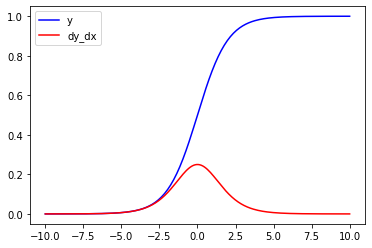

In [ ]:
x = tf.linspace(-10, 10, 200)

with tf.GradientTape() as tape:
  tape.watch(x)
  y = tf.nn.sigmoid(x)

dy_dx = tape.gradient(y, x)

plt.plot(x, y, c="b", label="y")
plt.plot(x, dy_dx, c="r", label="dy_dx")
plt.legend()
plt.show()

In [ ]:
import numpy as np

In [ ]:
x = tf.Variable([3.0, 5.0, 2.0])

with tf.GradientTape() as tape:
  y = x ** 2
  y = np.mean(y)
try:
  tape.gradient(y, x)
except:
  print("cant calculate gradient since it leave flow of tensorflow")

cant calculate gradient since it leave flow of tensorflow


# Training Loops

## Solving machine learning problems consists of following steps:
1. Obtaining training data
2. Define the model
3. Define the loss function 
4. Run through training data and calculating loss
5. Calculate the gradient for loss and use optimiser to adjust the variables to fit training data 
6. evaluate your model 

## Lets create simplest model

# x * w + b


In [ ]:
w = 36
b = 18

data_points = 1000

x = tf.random.normal([1000])

noise = tf.random.normal([1000])

y = x * w + b + noise

In [ ]:
import matplotlib.pyplot as plt

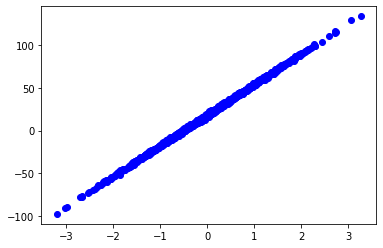

In [ ]:
plt.scatter(x, y, c="b")
plt.show()

## 1. Define the model
# *tf.module* 
### as base class also you can use tf.keras.Model and tf.keras.layers.Layer as base class

In [ ]:
class MyModel(tf.Module):
  def __init__(self, **kwargs):
    super().__init__(*kwargs)

    self.w = tf.Variable(3.0)
    self.b = tf.Variable(0.0)
    # self.noise = tf.random.normal([1000])

  def __call__(self, x):
    return self.w * x + self.b

In [ ]:
m = MyModel()

In [ ]:
# m(x)

## 2. Define the loss function

In [ ]:
def loss(target, pred):
  return tf.reduce_mean(tf.square(target - pred))

In [ ]:
loss(13, m(x))

<tf.Tensor: shape=(), dtype=float32, numpy=177.75352>

## 3. Defining trining loop

## Training loop consists following repeated tasks
1. Sending batch input through model to generate output
2. Calculating loss by comparing Target and Predictions
3. Calculate the Gradient ( *tf.GradientTape()* )
4. Use Optimiser to optimizing variables with gradients

In [ ]:
def train(model, x, y, learning_rate=0.01):

  with tf.GradientTape() as tape:
    _loss = loss(y, model(x))
  dw, db = tape.gradient(_loss, [model.w, model.b], unconnected_gradients=tf.UnconnectedGradients.ZERO)
  # print(dw, db)
  model.w.assign_sub(learning_rate * dw)
  model.b.assign_sub(learning_rate * db)

In [ ]:
ws, bs = [], []
def train_loop(model, x, y, epochs):
  for epoch in range(epochs):
    train(model, x, y, 0.1)
    ws.append(model.w.numpy())
    bs.append(model.b.numpy())
    new_loss = loss(y, model(x))
    print(f"epoch{epoch}, w={ws[-1]}, b={bs[-1]}, loss={new_loss}")

In [ ]:
print(f"w={m.w.numpy()}, b={m.b.numpy()}, loss={loss(y, m(x))}")
train_loop(m, x, y, 100)
print(f"true_w={w}, true_b={b}")

## Model using keras API


In [ ]:
class MyModelKeras(tf.keras.Model):
  def __init__(self, *kwargs):
    super().__init__(*kwargs)

    self.w = tf.Variable(5.0)
    self.b = tf.Variable(0.0)

  def __call__(self, x, **kwargs):
    return self.w * x + self.b


In [ ]:
km = MyModelKeras()

In [ ]:
train_loop(km, x, y, 10)

epoch0, w=11.230953216552734, b=3.6151726245880127, loss=824.360107421875
epoch1, w=16.20889663696289, b=6.502882480621338, loss=526.4777221679688
epoch2, w=20.18580436706543, b=8.8095121383667, loss=336.36981201171875
epoch3, w=23.362977981567383, b=10.651989936828613, loss=215.04344177246094
epoch4, w=25.901241302490234, b=12.123714447021484, loss=137.6131591796875
epoch5, w=27.929075241088867, b=13.29928970336914, loss=88.19733428955078
epoch6, w=29.549123764038086, b=14.238308906555176, loss=56.6602668762207
epoch7, w=30.84339141845703, b=14.988372802734375, loss=36.53336715698242
epoch8, w=31.877389907836914, b=15.587504386901855, loss=23.688425064086914
epoch9, w=32.70345687866211, b=16.06607437133789, loss=15.490817070007324


## Rather writting new training loop in keras, you can use keras built-in feature 
## ***model.compile()***

In [ ]:
km.compile(
    optimizer=tf.keras.optimizers.SGD(0.1),

    loss=tf.keras.losses.mean_squared_error,

    run_eagerly=False
)

In [ ]:
km.fit(
    x,
    y, 
    epochs=10, 
    batch_size=1000
)

Epoch 1/10
1/1 [==============================] - 0s 4ms/step - loss: 1.0307
Epoch 2/10
1/1 [==============================] - 0s 6ms/step - loss: 1.0307
Epoch 3/10
1/1 [==============================] - 0s 8ms/step - loss: 1.0307
Epoch 4/10
1/1 [==============================] - 0s 5ms/step - loss: 1.0307
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 1.0307
Epoch 6/10
1/1 [==============================] - 0s 4ms/step - loss: 1.0307
Epoch 7/10
1/1 [==============================] - 0s 4ms/step - loss: 1.0307
Epoch 8/10
1/1 [==============================] - 0s 4ms/step - loss: 1.0307
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 1.0307
Epoch 10/10
1/1 [==============================] - 0s 4ms/step - loss: 1.0307


# Advance autodiff

## advance automatic differentiation

In [ ]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (8, 6)

### controlling gradient record
### *tf.GradientTape().stop_recording()*

In [ ]:
x = tf.Variable(3.0)
y = tf.Variable(2.0)

with tf.GradientTape() as tape:
  x2 = x * x
  with tape.stop_recording():
    y2 = y * y
  
  z = x2 + y2

tape.gradient(z, [x, y])


[<tf.Tensor: shape=(), dtype=float32, numpy=6.0>, None]

### reseting stop gradient

In [ ]:
x = tf.Variable(3.0)
y = tf.Variable(2.0)

with tf.GradientTape() as tape:
  y2 = y * y ## strated recording

  tape.reset() ## reset all recording states

  x2 = x * x
  
  z = x2 + y2

grad = tape.gradient(z, {"x": x, "y": y })

print(grad["x"])
print(grad["y"])

tf.Tensor(6.0, shape=(), dtype=float32)
None


### stop gradient
### *tf.stop_gradient()*

In [ ]:
x = tf.Variable(3.0)
y = tf.Variable(2.0)

with tf.GradientTape() as tape:
  x2 = x * x
  y2 = y * y
  
  z = x2 + tf.stop_gradient(y2)

grad = tape.gradient(z, {"x": x, "y": y }, u)

print(grad["x"])
print(grad["y"])

tf.Tensor(6.0, shape=(), dtype=float32)
None
